# Capstone Project 1 - Data Wrangling
## Name: Brock Nosbisch

#### Summary:
The below code imports the pandas, numpy, and matplotlib.pyplot and then reads in a file named "cs-training.csv".  I then set the index and reordered the columns so that it is easier to see the correlations in a table format.  Two functions (one for min/max values and one for most/least common values) were created so that they can be used when reviewing the data values.  Then I reviewed the DataFrame and each field/column individually and made notes on if there appeared to be any NULL values, "bad" data, outliers, etc.  
After reviewing the data, I started cleaning the data by first removing the record where the Age was 0.  This was only a single record in the dataset.  Then I had originally removed all records where Monthly Income was NULL but I am now including this set of records in the dataset.  I also removed the records that had 96 or 98 in the past due columns.  NULL Monthly Incomes are set to -1.  Next I updated all "Number of Dependents" values to -1 where the value was NULL.  I want to review the correlation of the Nulls and 96/98 values to the other data to see if I see trends before deciding what to do with the data.  I also added a new column to store Monthly Incomes by bucket/bin and converted any datatypes that were wrong.



# Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_name = 'cs-training.csv'
col_names = ['id', 'serious_delinquent', 'unsecured_lines', 'age', 'past_due_30_59', 'debt_ratio', 'monthly_income', 
            'open_credit_lines', 'past_due_90_plus', 'real_estate_loans', 'past_due_60_89', 'number_of_dependents']

# Read in the file with new column names.
df = pd.read_csv(file_name, header=0, names=col_names, na_values='-1')
df.set_index('id', inplace=True)

# Reorder columns
new_col_ordering = [ 'age', 'debt_ratio', 'monthly_income', 
            'open_credit_lines', 'past_due_30_59', 'past_due_60_89', 'past_due_90_plus', 'serious_delinquent',
             'unsecured_lines', 'real_estate_loans', 'number_of_dependents']
df = df[new_col_ordering]

# Define functions where I am repeating the same processes


In [2]:

# Function: print_counts
# Description: This function returns the Least Frequent and Most Frequent values of the field passed in.
#              We have hardcoded the df DataFrame.
# Valid values for parameters:
# dataframe = DataFrame
# field_name = name of field in the DF dataframe.
# sorting = asc or desc
# num = The number of records you want returned.
def print_counts(dataframe, field_name, sorting = 'asc', num = '5'):
    
    if sorting == 'asc':
        tmpSort = True
    else:
        tmpSort = False
        
    #20190305 - tmp = 'df[\'' + field_name + '\'].value_counts(ascending=' + tmpSort + ').head(' + num + ')'
    print(dataframe[field_name].value_counts(ascending=tmpSort).head(int(num)))
    
    return None

# eval(print_counts('serious_delinquent', 'asc', '5'))

In [3]:

# Function: print_min_max
# Description: This function returns the Minimum or Maximum values of the field passed in.
#              We have hardcoded the df DataFrame.
# Valid values for parameters:
# dataframe = DataFrame
# field_name = name of field in the DF dataframe.
# min_max = min or max
# num = The number of records you want returned.
def print_min_max(dataframe, field_name, min_max = 'max', num = '5'):
    
    if min_max == 'max':
        tmpMinMax = False
    else:
        tmpMinMax = True
        
    #20190305 - tmp = 'df[\'' + field_name + '\'].value_counts().to_frame().reset_index().sort_values(\'index\', ascending=' + tmpMinMax + ').head(' + num + ')'
    print(dataframe[field_name].value_counts().to_frame().reset_index().sort_values('index', ascending=tmpMinMax).head(int(num)))
    
    return None
    
# eval(print_min_max('unsecured_lines', 'min', '5'))

In [4]:
# Function: add_value_labels
# Description: Creates labels for each bar in a bar graph
# Valid values for parameters:
# ax = pass your dataframe
# spacing = the space between the label and bar graph
def add_value_labels(ax, spacing=5):

    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        space = spacing
        va = 'bottom'

        if y_value < 0:
            space *= -1
            # Vertical alignment
            va = 'top'

        label = "{:}".format(y_value)  # Use :.1f if wanting decimals.

        # Create annotation
        ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va=va) 

# Review DataFrame Details


A few initial findings:  
* 2 of the fields contain null values.
* The minimum age is 0.
* The past due maximum values seem off since the dataset is only for 24 months.

In [5]:
df.info()
print('')
print('')

print(df.describe())
print(df.head(15))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
age                     150000 non-null int64
debt_ratio              150000 non-null float64
monthly_income          120269 non-null float64
open_credit_lines       150000 non-null int64
past_due_30_59          150000 non-null int64
past_due_60_89          150000 non-null int64
past_due_90_plus        150000 non-null int64
serious_delinquent      150000 non-null int64
unsecured_lines         150000 non-null float64
real_estate_loans       150000 non-null int64
number_of_dependents    146076 non-null float64
dtypes: float64(4), int64(7)
memory usage: 13.7 MB


                 age     debt_ratio  monthly_income  open_credit_lines  \
count  150000.000000  150000.000000    1.202690e+05      150000.000000   
mean       52.295207     353.005076    6.670221e+03           8.452760   
std        14.771866    2037.818523    1.438467e+04           5.145951   
min         0.000000      

## Person experienced 90 days past due delinquency or worse 
 There are only 2 distinct values and both are valid.

In [6]:
print('All Values')
print_counts(df, 'serious_delinquent', 'desc', '5')

All Values
0    139974
1     10026
Name: serious_delinquent, dtype: int64


## Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits.
The higher the amount, the worse a person is.

In [7]:
print('Maximum 5 Values')
print_min_max(df, 'unsecured_lines', 'max', '5')

Maximum 5 Values
          index  unsecured_lines
38807   50708.0                1
107425  29110.0                1
112115  22198.0                1
113030  22000.0                1
106240  20514.0                1


In [8]:
print('Minimum 5 Values')
print_min_max(df, 'unsecured_lines', 'min', '5')

Minimum 5 Values
           index  unsecured_lines
0       0.000000            10878
108764  0.000008                1
108487  0.000010                1
91171   0.000013                1
104642  0.000014                1


## Age of borrower in years

In [9]:
print('Youngest')
print('*The person with an Age of 0 must be bad data.  Will need to exclude this person')

print_min_max(df, 'age', 'min', '5')

Youngest
*The person with an Age of 0 must be bad data.  Will need to exclude this person
    index  age
85      0    1
69     21  183
63     22  434
59     23  641
56     24  816


In [10]:
print('Oldest')
print_min_max(df, 'age', 'max', '5')

Oldest
    index  age
82    109    2
83    107    1
84    105    1
79    103    3
80    102    3


## Number of times borrower has been 30-59 days past due but no worse in the last 2 years.
Need to clean up data for borrowers with 90+ times.

In [11]:
print_min_max(df, 'past_due_30_59', 'max', '25')

    index  past_due_30_59
6      98             264
11     96               5
14     13               1
13     12               2
15     11               1
12     10               4
10      9              12
9       8              25
8       7              54
7       6             140
5       5             342
4       4             747
3       3            1754
2       2            4598
1       1           16033
0       0          126018


## Monthly debt payments, alimony, living costs divided by monthy gross income
There are a lot of high Debt Ratios because we do not have Monthly Income data.
Looking at both the Top/Bottom Counts and Maximum/Minimum Values.

Need to figure out what to exclude.

In [12]:
print('Top 5 Counts')
print_counts(df, 'debt_ratio', 'desc', '5')

Top 5 Counts
0.0    4113
1.0     229
4.0     174
2.0     170
3.0     162
Name: debt_ratio, dtype: int64


In [13]:
print('Bottom 5 Counts')
print_counts(df, 'debt_ratio', 'asc', '5')

Bottom 5 Counts
0.656276    1
0.457568    1
0.755290    1
0.037634    1
0.367271    1
Name: debt_ratio, dtype: int64


In [14]:
print('Maximum 5 Values')
print_min_max(df, 'debt_ratio', 'max', '5')

Maximum 5 Values
          index  debt_ratio
65434  329664.0           1
94692  326442.0           1
30212  307001.0           1
32221  220516.0           1
93903  168835.0           1


In [15]:
print('Minimum 5 Values')
print_min_max(df, 'debt_ratio', 'min', '5')

Minimum 5 Values
           index  debt_ratio
0       0.000000        4113
73558   0.000026           1
106536  0.000037           1
79450   0.000039           1
106251  0.000066           1


## Monthly Income

In [16]:
print('As seen in df.info, confirming there are null values.')
print(df['monthly_income'][df['monthly_income'].isna()].head(5))



As seen in df.info, confirming there are null values.
id
7    NaN
9    NaN
17   NaN
33   NaN
42   NaN
Name: monthly_income, dtype: float64


In [17]:
print('Top 5 Counts')
print_counts(df, 'monthly_income', 'desc', '5')

Top 5 Counts
5000.0    2757
4000.0    2106
6000.0    1934
3000.0    1758
0.0       1634
Name: monthly_income, dtype: int64


In [18]:
print('Bottom 5 Counts')
print_counts(df, 'monthly_income', 'asc', '5')

Bottom 5 Counts
1037.0     1
13023.0    1
14210.0    1
10113.0    1
3847.0     1
Name: monthly_income, dtype: int64


In [19]:
print('Maximum 10 Values')
print_min_max(df, 'monthly_income', 'max', '10')

Maximum 10 Values
           index  monthly_income
11964  3008750.0               1
13361  1794060.0               1
11439  1560100.0               1
9858   1072500.0               1
10384   835040.0               1
10707   730483.0               1
11091   702500.0               1
11045   699530.0               1
13427   649587.0               1
12264   629000.0               1


In [20]:
print('Minimum 10 Values')
print_min_max(df, 'monthly_income', 'min', '10')

Minimum 10 Values
       index  monthly_income
4        0.0            1634
17       1.0             605
2523     2.0               6
7580     4.0               2
8769     5.0               2
12364    7.0               1
12139    9.0               1
7354    10.0               2
12023   11.0               1
11317   15.0               1


In [21]:
print('STD, MEAN, MEDIAN')
print(df['monthly_income'].std())
print(df['monthly_income'].mean())
print(df['monthly_income'].median())

STD, MEAN, MEDIAN
14384.674215282244
6670.221237392844
5400.0


Review Monthly Income in Histogram

Look at high values because they are causing severe outliers.
My initial thinking is that we can exclude all with a high income.


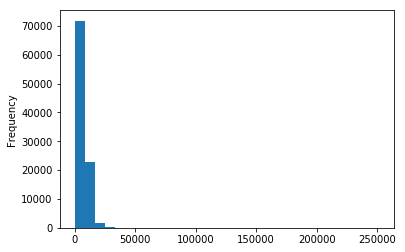


Plot only values < 50000 into bins of 30
I chose other values as well but 50k seems okay.


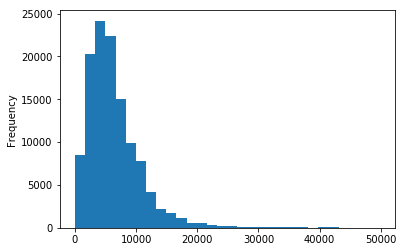


Plot only values < 50000 into bins of 100
I chose other values as well but 50k seems okay.


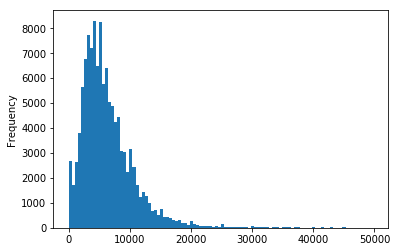


Box Plot for < 50000


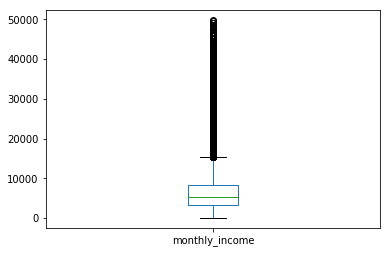

In [22]:

print('Review Monthly Income in Histogram')
df['monthly_income'][df['monthly_income']].plot(kind='hist', bins=30)

print('')
print('Look at high values because they are causing severe outliers.')
print('My initial thinking is that we can exclude all with a high income.')
plt.show()
print('')
print('Plot only values < 50000 into bins of 30')
print('I chose other values as well but 50k seems okay.')
df['monthly_income'][df['monthly_income'] < 50000].plot(kind='hist', bins=30)
plt.show()

print('')
print('Plot only values < 50000 into bins of 100')
print('I chose other values as well but 50k seems okay.')
df['monthly_income'][df['monthly_income'] < 50000].reindex().plot(kind='hist', bins=100)
plt.show()

print('')
print('Box Plot for < 50000')
df['monthly_income'][df['monthly_income'] < 50000].plot(kind='box')
plt.show()



## Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)

In [23]:
print('Top 5 Counts')
print_counts(df, 'open_credit_lines', 'desc', '5')

Top 5 Counts
6    13614
7    13245
5    12931
8    12562
4    11609
Name: open_credit_lines, dtype: int64


In [24]:
print('Bottom 5 Counts')
print_counts(df, 'open_credit_lines', 'asc', '5')

Bottom 5 Counts
58    1
53    1
44    2
47    2
50    2
Name: open_credit_lines, dtype: int64


In [25]:
print('Maximum 10 Values')
print_min_max(df, 'open_credit_lines', 'max', '10')

Maximum 10 Values
    index  open_credit_lines
57     58                  1
52     57                  2
51     56                  2
46     54                  4
56     53                  1
49     52                  3
50     51                  2
53     50                  2
47     49                  4
44     48                  6


In [26]:
print('Minimum 10 Values')
print_min_max(df, 'open_credit_lines', 'min', '10')

Minimum 10 Values
    index  open_credit_lines
17      0               1888
13      1               4438
10      2               6666
7       3               9058
4       4              11609
2       5              12931
0       6              13614
1       7              13245
3       8              12562
5       9              11355


## Number of times borrower has been 90 days or more past due.

In [27]:
print('Top 5 Counts')
print_counts(df, 'past_due_90_plus', 'desc', '5')

Top 5 Counts
0    141662
1      5243
2      1555
3       667
4       291
Name: past_due_90_plus, dtype: int64


In [28]:
print('Bottom 5 Counts')
print_counts(df, 'past_due_90_plus', 'asc', '5')

Bottom 5 Counts
17    1
15    2
14    2
12    2
13    4
Name: past_due_90_plus, dtype: int64


In [29]:
print('Maximum 10 Values')
print_min_max(df, 'past_due_90_plus', 'max', '10')

Maximum 10 Values
    index  past_due_90_plus
5      98               264
13     96                 5
18     17                 1
17     15                 2
16     14                 2
14     13                 4
15     12                 2
12     11                 5
11     10                 8
10      9                19


In [30]:
print('Minimum 10 Values')
print_min_max(df, 'past_due_90_plus', 'min', '10')

Minimum 10 Values
    index  past_due_90_plus
0       0            141662
1       1              5243
2       2              1555
3       3               667
4       4               291
6       5               131
7       6                80
8       7                38
9       8                21
10      9                19


## Number of mortgage and real estate loans including home equity lines of credit

In [31]:
print('Top 5 Counts')
print_counts(df, 'real_estate_loans', 'desc', '5')

Top 5 Counts
0    56188
1    52338
2    31522
3     6300
4     2170
Name: real_estate_loans, dtype: int64


In [32]:
print('Bottom 5 Counts')
print_counts(df, 'real_estate_loans', 'asc', '5')

Bottom 5 Counts
54    1
29    1
26    1
21    1
32    1
Name: real_estate_loans, dtype: int64


In [33]:
print('Maximum 10 Values')
print_min_max(df, 'real_estate_loans', 'max', '10')

Maximum 10 Values
    index  real_estate_loans
27     54                  1
23     32                  1
26     29                  1
25     26                  1
18     25                  3
22     23                  2
24     21                  1
21     20                  2
20     19                  2
19     18                  2


In [34]:
print('Minimum 10 Values')
print_min_max(df, 'real_estate_loans', 'max', '10')

Minimum 10 Values
    index  real_estate_loans
27     54                  1
23     32                  1
26     29                  1
25     26                  1
18     25                  3
22     23                  2
24     21                  1
21     20                  2
20     19                  2
19     18                  2


## Number of times borrower has been 60-89 days past due but no worse in the last 2 years.

In [35]:
print('Top 5 Counts')
print_counts(df, 'past_due_60_89', 'desc', '5')

Top 5 Counts
0     142396
1       5731
2       1118
3        318
98       264
Name: past_due_60_89, dtype: int64


In [36]:
print('Bottom 5 Counts')
print_counts(df, 'past_due_60_89', 'asc', '5')

Bottom 5 Counts
9     1
11    1
8     2
96    5
7     9
Name: past_due_60_89, dtype: int64


In [37]:
print('Maximum 10 Values')
print_min_max(df, 'past_due_60_89', 'max', '10')

Maximum 10 Values
    index  past_due_60_89
4      98             264
9      96               5
11     11               1
12      9               1
10      8               2
8       7               9
7       6              16
6       5              34
5       4             105
3       3             318


In [38]:
print('Minimum 10 Values')
print_min_max(df, 'past_due_60_89', 'min', '10')

Minimum 10 Values
    index  past_due_60_89
0       0          142396
1       1            5731
2       2            1118
3       3             318
5       4             105
6       5              34
7       6              16
8       7               9
10      8               2
12      9               1


## Number of dependents in family excluding themselves (spouse, children etc.)

In [39]:
print('Top 5 Counts')
print_counts(df, 'number_of_dependents', 'desc', '5')

Top 5 Counts
0.0    86902
1.0    26316
2.0    19522
3.0     9483
4.0     2862
Name: number_of_dependents, dtype: int64


In [40]:
print('Bottom 5 Counts')
print_counts(df, 'number_of_dependents', 'asc', '5')

Bottom 5 Counts
20.0     1
13.0     1
10.0     5
9.0      5
8.0     24
Name: number_of_dependents, dtype: int64


In [41]:
print('Maximum 10 Values')
print_min_max(df, 'number_of_dependents', 'max', '10')

Maximum 10 Values
    index  number_of_dependents
12   20.0                     1
11   13.0                     1
10   10.0                     5
9     9.0                     5
8     8.0                    24
7     7.0                    51
6     6.0                   158
5     5.0                   746
4     4.0                  2862
3     3.0                  9483


In [42]:
print('Minimum 10 Values')
print_min_max(df, 'number_of_dependents', 'min', '10')

Minimum 10 Values
   index  number_of_dependents
0    0.0                 86902
1    1.0                 26316
2    2.0                 19522
3    3.0                  9483
4    4.0                  2862
5    5.0                   746
6    6.0                   158
7    7.0                    51
8    8.0                    24
9    9.0                     5


# Cleaning Data

In [43]:
print('Exclude Record(s) that have an Age of 0.')
df = (df[df['age'] != 0])
print()
print('Any records in df where age = 0? (Empty DataFrame means No)')
print(df[df['age'] == 0])


Exclude Record(s) that have an Age of 0.

Any records in df where age = 0? (Empty DataFrame means No)
Empty DataFrame
Columns: [age, debt_ratio, monthly_income, open_credit_lines, past_due_30_59, past_due_60_89, past_due_90_plus, serious_delinquent, unsecured_lines, real_estate_loans, number_of_dependents]
Index: []


In [44]:

print('Update Records where Monthly Income is null.  Need to update to -1 so that we can convert the data type.')
df['monthly_income'][df['monthly_income'].isnull()] = -1
print(df.head(10))



Update Records where Monthly Income is null.  Need to update to -1 so that we can convert the data type.
    age   debt_ratio  monthly_income  open_credit_lines  past_due_30_59  \
id                                                                        
1    45     0.802982          9120.0                 13               2   
2    40     0.121876          2600.0                  4               0   
3    38     0.085113          3042.0                  2               1   
4    30     0.036050          3300.0                  5               0   
5    49     0.024926         63588.0                  7               1   
6    74     0.375607          3500.0                  3               0   
7    57  5710.000000            -1.0                  8               0   
8    39     0.209940          3500.0                  8               0   
9    27    46.000000            -1.0                  2               0   
10   57     0.606291         23684.0                  9               

In [45]:
print('Update Number of Dependents column to -1 for those that are NULL.')
df['number_of_dependents'][df['number_of_dependents'].isnull()] = -1





Update Number of Dependents column to -1 for those that are NULL.


In [46]:
print('Create Monthly Income Buckets (may need to adjust later)')
print('Buckets are:')
print('1 = 0-499; 2 = 500-999; 3 = 1000-2499;')
print('4 = 2500-4999; 5 = 5000-7499; 6 = 7500-9999;')
print('7 = 10000-24999; 8 = 25000-49999; 9 = 50000+')
# Create income buckets
df.loc[df['monthly_income'] <0, 'monthly_income_bucket'] = 0
df.loc[df['monthly_income'] >=0, 'monthly_income_bucket'] = 1
df.loc[df['monthly_income'] >=500, 'monthly_income_bucket'] = 2
df.loc[df['monthly_income'] >=1000, 'monthly_income_bucket'] = 3
df.loc[df['monthly_income'] >=2500, 'monthly_income_bucket'] = 4
df.loc[df['monthly_income'] >=5000, 'monthly_income_bucket'] = 5
df.loc[df['monthly_income'] >=7500, 'monthly_income_bucket'] = 6
df.loc[df['monthly_income'] >=10000, 'monthly_income_bucket'] = 7
df.loc[df['monthly_income'] >=25000, 'monthly_income_bucket'] = 8
df.loc[df['monthly_income'] >=50000, 'monthly_income_bucket'] = 9

# Create income bucket names
df.loc[df['monthly_income'] <0, 'monthly_income_name'] = 'No Value'
df.loc[df['monthly_income'] >=0, 'monthly_income_name'] = '0-499'
df.loc[df['monthly_income'] >=500, 'monthly_income_name'] = '500-999'
df.loc[df['monthly_income'] >=1000, 'monthly_income_name'] = '1000-2499'
df.loc[df['monthly_income'] >=2500, 'monthly_income_name'] = '2500-4999'
df.loc[df['monthly_income'] >=5000, 'monthly_income_name'] = '5000-7499'
df.loc[df['monthly_income'] >=7500, 'monthly_income_name'] = '7500-9999'
df.loc[df['monthly_income'] >=10000, 'monthly_income_name'] = '10000-24999'
df.loc[df['monthly_income'] >=25000, 'monthly_income_name'] = '25000-49999'
df.loc[df['monthly_income'] >=50000, 'monthly_income_name'] = '50000+'

print()
print('Verify the new column was added and is populating correctly.')
print(df[['monthly_income','monthly_income_bucket','monthly_income_name']].head(10))


Create Monthly Income Buckets (may need to adjust later)
Buckets are:
1 = 0-499; 2 = 500-999; 3 = 1000-2499;
4 = 2500-4999; 5 = 5000-7499; 6 = 7500-9999;
7 = 10000-24999; 8 = 25000-49999; 9 = 50000+

Verify the new column was added and is populating correctly.
    monthly_income  monthly_income_bucket monthly_income_name
id                                                           
1           9120.0                    6.0           7500-9999
2           2600.0                    4.0           2500-4999
3           3042.0                    4.0           2500-4999
4           3300.0                    4.0           2500-4999
5          63588.0                    9.0              50000+
6           3500.0                    4.0           2500-4999
7             -1.0                    0.0            No Value
8           3500.0                    4.0           2500-4999
9             -1.0                    0.0            No Value
10         23684.0                    7.0         10000-2

In [47]:
print('Evaluate the 96/98 records where the 30-59, 60-89, or 90+ past due buckets')
print()
print_min_max(df, 'past_due_30_59', 'max', '10')
print()
print_min_max(df, 'past_due_60_89', 'max', '10')
print()
print_min_max(df, 'past_due_90_plus', 'max', '10')
print()
print('I am removing these 96/98 records since there are only 269 out of 150k records.')
df = (df[df['past_due_30_59'] < 25])
df = (df[df['past_due_60_89'] < 25])
df = (df[df['past_due_90_plus'] < 25])
print()
print('Any records in df where past due columns are > 25? (Empty DataFrame means No)')
print()
print(df[df['past_due_30_59'] > 25])
print()
print(df[df['past_due_60_89'] > 25])
print()
print(df[df['past_due_90_plus'] > 25])



Evaluate the 96/98 records where the 30-59, 60-89, or 90+ past due buckets

    index  past_due_30_59
6      98             264
11     96               5
14     13               1
13     12               2
15     11               1
12     10               4
10      9              12
9       8              25
8       7              54
7       6             140

    index  past_due_60_89
4      98             264
9      96               5
11     11               1
12      9               1
10      8               2
8       7               9
7       6              16
6       5              34
5       4             105
3       3             318

    index  past_due_90_plus
5      98               264
13     96                 5
18     17                 1
17     15                 2
16     14                 2
14     13                 4
15     12                 2
12     11                 5
11     10                 8
10      9                19

I am removing these 96/98 records since t

In [48]:
print('Convert float to int64 where no decimals are needed.')
df = df.astype({'monthly_income_bucket':'int64', 'monthly_income':'int64', 'number_of_dependents':'int64' })
print(df.info())

Convert float to int64 where no decimals are needed.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 149730 entries, 1 to 150000
Data columns (total 13 columns):
age                      149730 non-null int64
debt_ratio               149730 non-null float64
monthly_income           149730 non-null int64
open_credit_lines        149730 non-null int64
past_due_30_59           149730 non-null int64
past_due_60_89           149730 non-null int64
past_due_90_plus         149730 non-null int64
serious_delinquent       149730 non-null int64
unsecured_lines          149730 non-null float64
real_estate_loans        149730 non-null int64
number_of_dependents     149730 non-null int64
monthly_income_bucket    149730 non-null int64
monthly_income_name      149730 non-null object
dtypes: float64(2), int64(10), object(1)
memory usage: 16.0+ MB
None


In [49]:
print('Final DataFrame Columns:')
print(df.columns)

Final DataFrame Columns:
Index(['age', 'debt_ratio', 'monthly_income', 'open_credit_lines',
       'past_due_30_59', 'past_due_60_89', 'past_due_90_plus',
       'serious_delinquent', 'unsecured_lines', 'real_estate_loans',
       'number_of_dependents', 'monthly_income_bucket', 'monthly_income_name'],
      dtype='object')


In [50]:
print('DF Info:')
print(df.info())

DF Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 149730 entries, 1 to 150000
Data columns (total 13 columns):
age                      149730 non-null int64
debt_ratio               149730 non-null float64
monthly_income           149730 non-null int64
open_credit_lines        149730 non-null int64
past_due_30_59           149730 non-null int64
past_due_60_89           149730 non-null int64
past_due_90_plus         149730 non-null int64
serious_delinquent       149730 non-null int64
unsecured_lines          149730 non-null float64
real_estate_loans        149730 non-null int64
number_of_dependents     149730 non-null int64
monthly_income_bucket    149730 non-null int64
monthly_income_name      149730 non-null object
dtypes: float64(2), int64(10), object(1)
memory usage: 16.0+ MB
None


In [51]:
print('DF Describe:')
print(df.describe())

DF Describe:
                 age     debt_ratio  monthly_income  open_credit_lines  \
count  149730.000000  149730.000000    1.497300e+05      149730.000000   
mean       52.327984     353.631316    5.355018e+03           8.467949   
std        14.754371    2039.601344    1.316254e+04           5.138107   
min        21.000000       0.000000   -1.000000e+00           0.000000   
25%        41.000000       0.175994    1.583000e+03           5.000000   
50%        52.000000       0.367119    4.375000e+03           8.000000   
75%        63.000000       0.870023    7.400000e+03          11.000000   
max       109.000000  329664.000000    3.008750e+06          58.000000   

       past_due_30_59  past_due_60_89  past_due_90_plus  serious_delinquent  \
count   149730.000000   149730.000000     149730.000000       149730.000000   
mean         0.245789        0.064823          0.090456            0.065979   
std          0.697779        0.330074          0.485529            0.248246   
min 

In [52]:
print('Sample Data:')
print(df.head(10))

Sample Data:
    age   debt_ratio  monthly_income  open_credit_lines  past_due_30_59  \
id                                                                        
1    45     0.802982            9120                 13               2   
2    40     0.121876            2600                  4               0   
3    38     0.085113            3042                  2               1   
4    30     0.036050            3300                  5               0   
5    49     0.024926           63588                  7               1   
6    74     0.375607            3500                  3               0   
7    57  5710.000000              -1                  8               0   
8    39     0.209940            3500                  8               0   
9    27    46.000000              -1                  2               0   
10   57     0.606291           23684                  9               0   

    past_due_60_89  past_due_90_plus  serious_delinquent  unsecured_lines  \
id       

In [53]:
print('Create Age Buckets (may need to adjust later)')

# Create age buckets
df.loc[df['age'] >=20, 'age_bucket'] = 1
df.loc[df['age'] >=30, 'age_bucket'] = 2
df.loc[df['age'] >=40, 'age_bucket'] = 3
df.loc[df['age'] >=50, 'age_bucket'] = 4
df.loc[df['age'] >=60, 'age_bucket'] = 5
df.loc[df['age'] >=70, 'age_bucket'] = 6
df.loc[df['age'] >=80, 'age_bucket'] = 7
df.loc[df['age'] >=90, 'age_bucket'] = 8
df.loc[df['age'] >=100, 'age_bucket'] = 9

df.loc[df['age'] >=20, 'age_bucket_name'] = '20-29'
df.loc[df['age'] >=30, 'age_bucket_name'] = '30-39'
df.loc[df['age'] >=40, 'age_bucket_name'] = '40-49'
df.loc[df['age'] >=50, 'age_bucket_name'] = '50-59'
df.loc[df['age'] >=60, 'age_bucket_name'] = '60-69'
df.loc[df['age'] >=70, 'age_bucket_name'] = '70-79'
df.loc[df['age'] >=80, 'age_bucket_name'] = '80-89'
df.loc[df['age'] >=90, 'age_bucket_name'] = '90-99'
df.loc[df['age'] >=100, 'age_bucket_name'] = 'Over 100'

df.head(5)

Create Age Buckets (may need to adjust later)


,age,debt_ratio,monthly_income,open_credit_lines,past_due_30_59,past_due_60_89,past_due_90_plus,serious_delinquent,unsecured_lines,real_estate_loans,number_of_dependents,monthly_income_bucket,monthly_income_name,age_bucket,age_bucket_name
id,,,,,,,,,,,,,,,
1,45,0.802982,9120,13,2,0,0,1,0.766127,6,2,6,7500-9999,3.0,40-49
2,40,0.121876,2600,4,0,0,0,0,0.957151,0,1,4,2500-4999,3.0,40-49
3,38,0.085113,3042,2,1,0,1,0,0.658180,0,0,4,2500-4999,2.0,30-39
4,30,0.036050,3300,5,0,0,0,0,0.233810,0,0,4,2500-4999,2.0,30-39
5,49,0.024926,63588,7,1,0,0,0,0.907239,1,0,9,50000+,3.0,40-49


In [54]:
# Create age buckets
# Buckets are:
# 1 = 20-29; 2 = 30-39; 3 = 40-49;
# 4 = 50-59; 5 = 60-69; 6 = 70-79;
# 7 = 80-89; 8 = 90-99; 9 = 100+
df.loc[df['age'] >=20, 'age_bucket'] = 1
df.loc[df['age'] >=30, 'age_bucket'] = 2
df.loc[df['age'] >=40, 'age_bucket'] = 3
df.loc[df['age'] >=50, 'age_bucket'] = 4
df.loc[df['age'] >=60, 'age_bucket'] = 5
df.loc[df['age'] >=70, 'age_bucket'] = 6
df.loc[df['age'] >=80, 'age_bucket'] = 7
df.loc[df['age'] >=90, 'age_bucket'] = 8
df.loc[df['age'] >=100, 'age_bucket'] = 9

df.loc[df['age'] >=20, 'age_bucket_name'] = '20-29'
df.loc[df['age'] >=30, 'age_bucket_name'] = '30-39'
df.loc[df['age'] >=40, 'age_bucket_name'] = '40-49'
df.loc[df['age'] >=50, 'age_bucket_name'] = '50-59'
df.loc[df['age'] >=60, 'age_bucket_name'] = '60-69'
df.loc[df['age'] >=70, 'age_bucket_name'] = '70-79'
df.loc[df['age'] >=80, 'age_bucket_name'] = '80-89'
df.loc[df['age'] >=90, 'age_bucket_name'] = '90-99'
df.loc[df['age'] >=100, 'age_bucket_name'] = 'Over 100'

# Create a Debt Ratio bucket based on every 10% quantile
df.loc[df['debt_ratio'] >= 0, 'debt_ratio_bucket'] = 0
df.loc[df['debt_ratio'] > df['debt_ratio'].quantile(.1), 'debt_ratio_bucket'] = 1
df.loc[df['debt_ratio'] > df['debt_ratio'].quantile(.2), 'debt_ratio_bucket'] = 2
df.loc[df['debt_ratio'] > df['debt_ratio'].quantile(.3), 'debt_ratio_bucket'] = 3
df.loc[df['debt_ratio'] > df['debt_ratio'].quantile(.4), 'debt_ratio_bucket'] = 4
df.loc[df['debt_ratio'] > df['debt_ratio'].quantile(.5), 'debt_ratio_bucket'] = 5
df.loc[df['debt_ratio'] > df['debt_ratio'].quantile(.6), 'debt_ratio_bucket'] = 6
df.loc[df['debt_ratio'] > df['debt_ratio'].quantile(.7), 'debt_ratio_bucket'] = 7
df.loc[df['debt_ratio'] > df['debt_ratio'].quantile(.8), 'debt_ratio_bucket'] = 8
df.loc[df['debt_ratio'] > df['debt_ratio'].quantile(.9), 'debt_ratio_bucket'] = 9

# Create a Debt Ratio bucket based on every 10% quantile
df.loc[df['debt_ratio'] >= 0, 'debt_ratio_name'] = 0
df.loc[df['debt_ratio'] > df['debt_ratio'].quantile(.1), 'debt_ratio_name'] = df['debt_ratio'].quantile(.1)
df.loc[df['debt_ratio'] > df['debt_ratio'].quantile(.2), 'debt_ratio_name'] = df['debt_ratio'].quantile(.2)
df.loc[df['debt_ratio'] > df['debt_ratio'].quantile(.3), 'debt_ratio_name'] = df['debt_ratio'].quantile(.3)
df.loc[df['debt_ratio'] > df['debt_ratio'].quantile(.4), 'debt_ratio_name'] = df['debt_ratio'].quantile(.4)
df.loc[df['debt_ratio'] > df['debt_ratio'].quantile(.5), 'debt_ratio_name'] = df['debt_ratio'].quantile(.5)
df.loc[df['debt_ratio'] > df['debt_ratio'].quantile(.6), 'debt_ratio_name'] = df['debt_ratio'].quantile(.6)
df.loc[df['debt_ratio'] > df['debt_ratio'].quantile(.7), 'debt_ratio_name'] = df['debt_ratio'].quantile(.7)
df.loc[df['debt_ratio'] > df['debt_ratio'].quantile(.8), 'debt_ratio_name'] = df['debt_ratio'].quantile(.8)
df.loc[df['debt_ratio'] > df['debt_ratio'].quantile(.9), 'debt_ratio_name'] = df['debt_ratio'].quantile(.9)

# Create column names for later use.
# debt_ratio_column_names = ('0-10%','11-20%','21-30%','31-40%','41-50%','51-60%','61-70%','71-80%','81-90%','91-100%')

# Create new flag for each past due column.
df.loc[df['past_due_90_plus'] > 0, 'past_due_90_plus_flag'] = 1
df.loc[df['past_due_90_plus'] <= 0, 'past_due_90_plus_flag'] = 0

df.loc[df['past_due_60_89'] > 0, 'past_due_60_89_flag'] = 1
df.loc[df['past_due_60_89'] <= 0, 'past_due_60_89_flag'] = 0

df.loc[df['past_due_30_59'] > 0, 'past_due_30_59_flag'] = 1
df.loc[df['past_due_30_59'] <= 0, 'past_due_30_59_flag'] = 0

df.head(5)



,age,debt_ratio,monthly_income,open_credit_lines,past_due_30_59,past_due_60_89,past_due_90_plus,serious_delinquent,unsecured_lines,real_estate_loans,number_of_dependents,monthly_income_bucket,monthly_income_name,age_bucket,age_bucket_name,debt_ratio_bucket,debt_ratio_name,past_due_90_plus_flag,past_due_60_89_flag,past_due_30_59_flag
id,,,,,,,,,,,,,,,,,,,,
1,45,0.802982,9120,13,2,0,0,1,0.766127,6,2,6,7500-9999,3.0,40-49,7.0,0.650162,0.0,0.0,1.0
2,40,0.121876,2600,4,0,0,0,0,0.957151,0,1,4,2500-4999,3.0,40-49,1.0,0.032376,0.0,0.0,0.0
3,38,0.085113,3042,2,1,0,1,0,0.658180,0,0,4,2500-4999,2.0,30-39,1.0,0.032376,1.0,0.0,1.0
4,30,0.036050,3300,5,0,0,0,0,0.233810,0,0,4,2500-4999,2.0,30-39,1.0,0.032376,0.0,0.0,0.0
5,49,0.024926,63588,7,1,0,0,0,0.907239,1,0,9,50000+,3.0,40-49,0.0,0.000000,0.0,0.0,1.0


### Write data to file to use in Data Story

In [55]:
filename = 'data_wrangling_out.csv'
df.to_csv(filename)